In [58]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart, rotate
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
from matplotlib import pyplot as plt
%matplotlib inline

In [126]:
img = cv2.imread("../images/bus.png",0)
img = cv2.resize(img,(480,480))

# imgo = np.copy(img)
rows,cols = img.shape
M = np.float32([[1,0,50],[0,1,0]])
# img = cv2.warpAffine(img,M,(cols,rows))
# img[:,0:50] = imgo[:,:430:480]
# img = rotate(img, 23,resize=True)
# img = cv2.resize(img,(480,480))

imgo = np.copy(img)
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


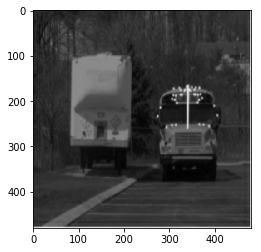

In [127]:
plt.imshow(img, cmap='gray')

In [128]:

orb = cv2.ORB_create()
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)


Num of keypts  495


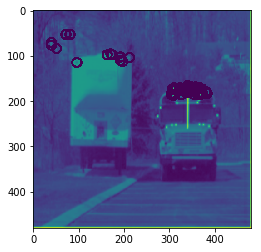

(<matplotlib.image.AxesImage at 0x123c53470>, None)

In [131]:
img = np.copy(imgo)
print('Num of keypts ',len(kp))
for i in range(50):
#     print(kp[i].pt)
    cv2.circle(img,(int(kp[i].pt[0]),int(kp[i].pt[1])),10 , (0,0,0), 3)
plt.imshow(img),plt.show()

(480, 180)


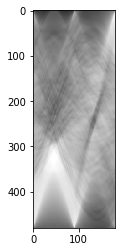

In [121]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
# print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)


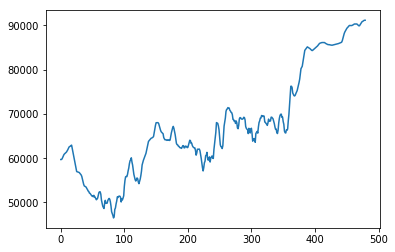

83


In [122]:
b = sinogram1[:,0]
# b[259] = b[259]*2
print(b.shape)
# print(b)
# print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [123]:
min_angles = []
for k in range(180):
    
    b = sinogram1[:,k]
    conv_sz = [51,101,151]
    ans = np.zeros(np.shape(b)[0])
    for i in range(len(conv_sz)):
        for j in range(int(conv_sz[i]/2)):
            vec = np.zeros(conv_sz[i])
            vec[j] = 1 + j
            vec[conv_sz[i] - 1 -j] = -1-j
            ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    #restrict to center
#     ans_m = ans
    ans_m = ans[100:300]
    center = np.argmin(ans_m)+100
    min_val = min(ans_m)
#     if center <230 or center > 250:
#         min_val = min_val*10000
        
    min_angles.append(min_val/len(conv_sz))
        
    print('angle: ',k,'Val: ',min_val/len(conv_sz),'At arg: ',center)
    # print(np.shape(ans))
#     print(np.argmin(ans))


angle:  0 Val:  3433700.3333333335 At arg:  299
angle:  1 Val:  3460988.9934345707 At arg:  176
angle:  2 Val:  3305481.374826973 At arg:  176
angle:  3 Val:  3078428.296330621 At arg:  176
angle:  4 Val:  2972113.201917684 At arg:  297
angle:  5 Val:  2836654.476370198 At arg:  175
angle:  6 Val:  2646302.621710714 At arg:  174
angle:  7 Val:  2524606.4000614984 At arg:  174
angle:  8 Val:  2132410.2446782985 At arg:  175
angle:  9 Val:  2346933.144051179 At arg:  174
angle:  10 Val:  2449792.9287035777 At arg:  173
angle:  11 Val:  2392325.031288531 At arg:  186
angle:  12 Val:  2229013.9115334763 At arg:  185
angle:  13 Val:  2592317.2358555584 At arg:  190
angle:  14 Val:  2377634.969809105 At arg:  191
angle:  15 Val:  2004961.0653094498 At arg:  193
angle:  16 Val:  1748611.186731944 At arg:  194
angle:  17 Val:  2224309.660013299 At arg:  196
angle:  18 Val:  2635271.9976390535 At arg:  122
angle:  19 Val:  2130898.450794315 At arg:  126
angle:  20 Val:  2304065.992505349 At arg

angle:  175 Val:  1952557.8091861058 At arg:  164
angle:  176 Val:  2402541.807771397 At arg:  265
angle:  177 Val:  2586100.716365939 At arg:  175
angle:  178 Val:  2407451.990315154 At arg:  176
angle:  179 Val:  2282875.960914956 At arg:  177


In [124]:
# print(min_angles)
print(np.argmin(min_angles))
# for h in range(180):
#     if min_angles[h]<91000:
#         print(h)
#         print(min_angles[h])

108


(480, 480)


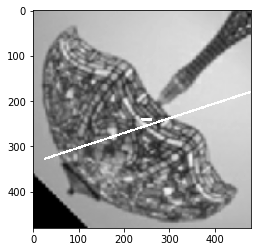

In [125]:
ang = 108
sym_pt = 253

print(np.shape(imgo))
img = np.copy(imgo)
# img = cv2.resize(img,(64,64))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),3)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [105]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 3976.01666667  4191.71258687  4390.57023427  4571.00735922
  4819.85104967  5155.7738808   5524.04136161  5960.92225905
  6412.61780278  6854.12814583  7315.26531394  7792.32931493
  8291.00963541  8757.19891513  9122.43692011  9426.26529559
  9668.67257699  9857.85738166 10012.55180051 10134.8514526
 10250.04765549 10330.8580199  10338.2641037  10267.96035808
 10178.29600978 10138.72924578 10154.91963661 10291.34170646
 10496.95542724 10780.01792859 11168.91496394 11614.83762229
 11983.19209268 12346.08578539 12706.70264915 13059.67942644
 13459.88201998 13983.54800665 14494.30571259 14988.28479531
 15414.69913159 15768.13763891 16122.47832632 16544.5114069
 17163.53416664 17840.15475335 18616.96438118 19714.52290579
 20714.21304127 21486.89907365 21979.00339519 22334.06706465
 22664.26323869 22981.78467825 23166.97528517 23004.42447296
 22733.29109423 22443.92144696 22127.54854038 21721.28793564
 21112.85731594 20263.46871942 19273.0770251  18489.36710366
 18026.1731727  17536.6598

In [190]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

5
54
123
171
176
count 5


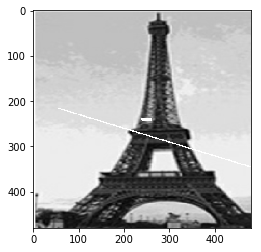

In [266]:
img = cv2.imread("../images/ball90.png",0)
ang = 73
sym_pt = 286
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),2)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [271]:
# img = np.copy(imgo)
# img = cv2.resize(img,(480,480))
# img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
# img = cv2.line(img,(231,480),(231,0),(255,255,255),2)
# plt.imshow(img, cmap='gray')




In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
